# ***Student Performance & Behavior Dataset***

## **Problem Statement**

---

 New Section
Student performance is influenced by a combination of academic, behavioral, and socioeconomic factors. This dataset, collected from a private learning provider, presents an opportunity to analyze key determinants of student success, including attendance, study habits, stress levels, and family background. However, challenges such as missing values, potential grading biases, and imbalanced distributions across departments may affect the accuracy of insights. The goal of this analysis is to explore patterns and correlations that impact academic performance, identify factors that contribute to student success or struggle, and provide actionable recommendations for educators and policymakers. By understanding these relationships, institutions can implement data-driven strategies to improve student outcomes

## **Target Variable**
The primary target variable in this dataset is "Total_Score", which represents the weighted sum of all academic assessments, including midterm and final exam scores, assignments, quizzes, participation, and projects. This variable serves as a comprehensive measure of student performance and will be used to analyze the impact of various academic, behavioral, and demographic factors on overall success. Additionally, the "Grade" column, which categorizes students into letter grades (A, B, C, D, F), can also be considered a target variable for classification-based analysis. Understanding the key predictors of Total_Score and Grade will help educators and institutions implement targeted interventions to improve student learning outcomes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Students_Grading_Dataset.csv")
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [ ]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [ ]:
df.drop(columns=['Parent_Education_Level'], inplace=True)

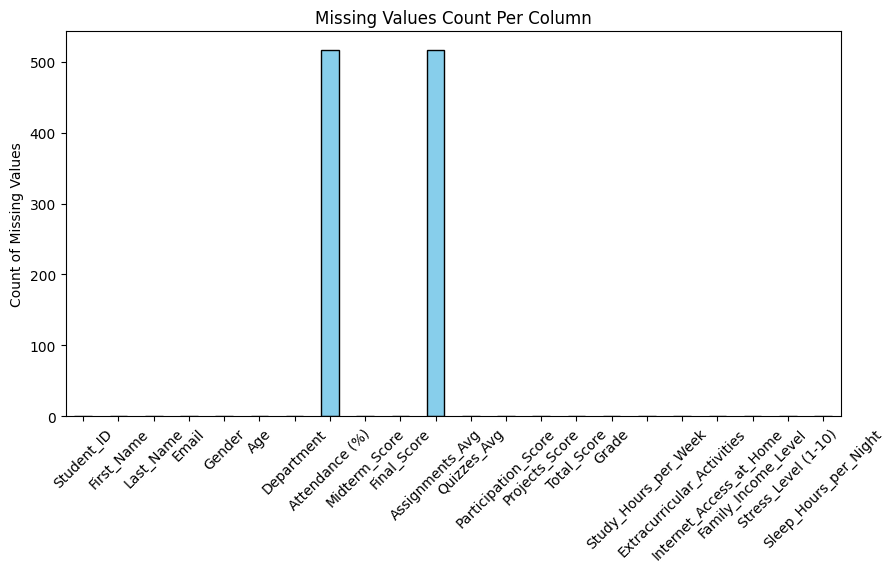

In [ ]:
df.isnull().sum().plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title("Missing Values Count Per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean(), inplace=True)

<ipython-input-17-49af9ce9c62f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean(), inplace=True)


In [ ]:
df['Attendance (%)'].fillna(df['Attendance (%)'].mean(),inplace=True)

<ipython-input-19-e59456d74446>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance (%)'].fillna(df['Attendance (%)'].mean(),inplace=True)


<ipython-input-25-8443beedc694>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['midterm', 'final', 'total'],


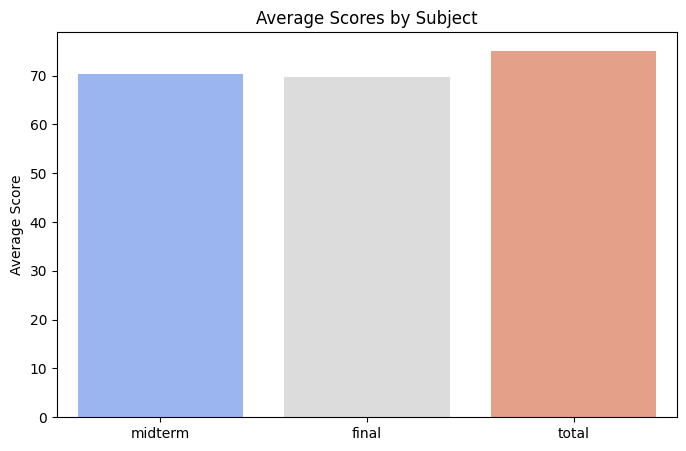

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=['midterm', 'final', 'total'],
            y=[df['Midterm_Score'].mean(), df['Final_Score'].mean(), df['Total_Score'].mean()],
            palette="coolwarm")
plt.title("Average Scores by Subject")
plt.ylabel("Average Score")
plt.show()

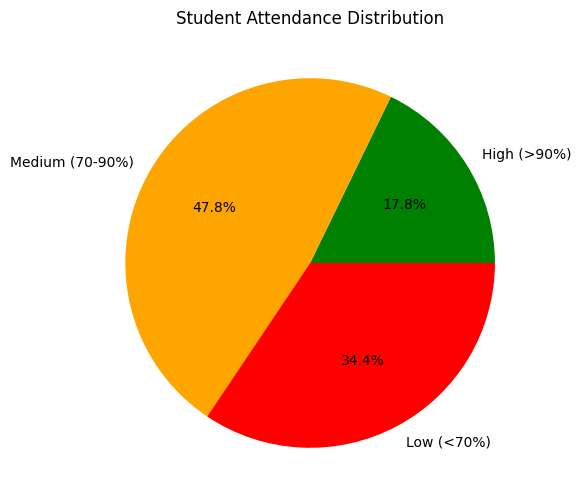

In [ ]:
attendance_labels = ['High (>90%)', 'Medium (70-90%)', 'Low (<70%)']
attendance_counts = [sum(df['Attendance (%)'] > 90),
                     sum((df['Attendance (%)'] >= 70) & (df['Attendance (%)'] <= 90)),
                     sum(df['Attendance (%)'] < 70)]

plt.figure(figsize=(6,6))
plt.pie(attendance_counts, labels=attendance_labels, autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("Student Attendance Distribution")
plt.show()

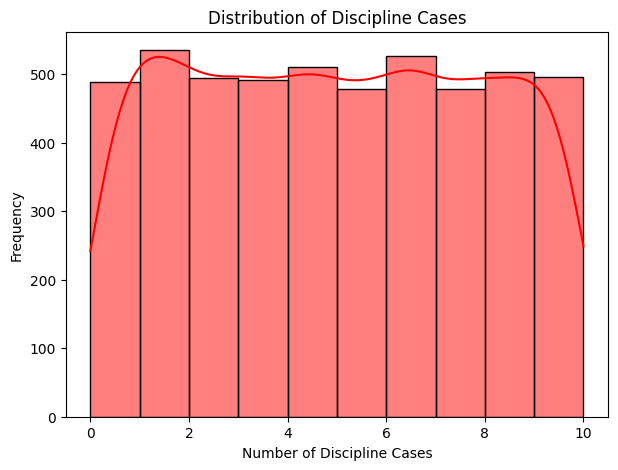

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Participation_Score'], bins=10, kde=True, color='red')
plt.title("Distribution of Discipline Cases")
plt.xlabel("Number of Discipline Cases")
plt.ylabel("Frequency")
plt.show()